In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [5]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just SHH group

In [7]:
group4_list = set()

for column in data.columns:
    if "Group 4" in column: 
        group4_list = group4_list.union(set(data[column].replace({"":None}).dropna()))   

print(group4_list)

{'LMX1A', 'MLL3', 'MYCN', 'SNCAIP', 'ZNF35', 'ZNF513', 'TBR1', 'KDM4C', 'CHD7', 'KDM6A', 'OTX2', 'KDM1A', 'BARHL1', 'UNC5D', 'STAT5A', 'ZIC1', 'KHDR2', 'EZH2', 'SIX2', 'EOMES', 'KDM7A', 'LHX5', 'KDM5A', 'POU2F1', 'KDM5B', 'ERK', 'ZMYM3', 'SIX6', 'ZIC4', 'ARID5B', 'EOMES/TBR2', 'LHX1', 'UNCX', 'HLF', 'KDM3A', 'CUX2', 'LHX2', 'EN2', 'AKT'}


# Creating a Network starting from All Omnipath interactions

In [45]:
group4_net = Network(group4_list, resources = omnipath)

Error: node LMX1A is not present in the resources database
Error: node ZNF35 is not present in the resources database
Error: node ZNF513 is not present in the resources database
Error: node CHD7 is not present in the resources database
Error: node KHDR2 is not present in the resources database
Error: node SIX2 is not present in the resources database
Error: node EOMES is not present in the resources database
Error: node LHX5 is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node EOMES/TBR2 is not present in the resources database
Error: node UNCX is not present in the resources database
Error: node HLF is not present in the resources database


Adding the node that were not found manually: PDLI3 --> PDLIM3, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [46]:
group4_net.add_node("TBR2")

Error: node TBR2 is not present in the resources database


In [47]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2C,Q8NEZ4,NaN
1,MYCN,P04198,NaN
2,SNCAIP,Q9Y6H5,NaN
3,TBR1,Q16650,NaN
4,KDM4C,Q9H3R0,NaN
5,KDM6A,O15550,NaN
6,OTX2,P32243,NaN
7,KDM1A,O60341,NaN
8,BARHL1,Q9BZE3,NaN
9,UNC5D,Q6UXZ4,NaN


In [48]:
%%time
group4_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 2min 5s, sys: 14 ms, total: 2min 5s
Wall time: 2min 5s


In [19]:
group4_net.nodes

,Genesymbol,Uniprot,Type
0,KMT2C,Q8NEZ4,NaN
1,MYCN,P04198,NaN
2,SNCAIP,Q9Y6H5,NaN
3,TBR1,Q16650,NaN
4,KDM4C,Q9H3R0,NaN
...,...,...,...
122,PARP1,P09874,NaN
123,LEF1,Q9UJU2,NaN
124,TLE1,Q04724,NaN
125,DLX5,P56178,NaN


In [49]:
group4_net.edges

,source,target,Type,Effect,References
0,P04198,P04637,None,stimulation,SPIKE:20145147;SPIKE_LC:20145147; SPIKE:201451...
1,P04637,Q8IUQ4,None,stimulation,ACSN:12077306;ACSN:12438652;ACSN:14985507;SPIK...
2,Q8IUQ4,Q9Y6H5,None,inhibition,HPRD:14506261;InnateDB:15064394;SIGNOR:1617477...
3,P04637,Q05397,None,inhibition,HPRD:15855171;IntAct:15855171;IntAct:19857493;...
4,O14936,Q16650,None,stimulation,HPRD:10749215;Lit-BM-17:10749215;Lit-BM-17:113...
...,...,...,...,...,...
498,O00141,Q99835,None,inhibition,SIGNOR:25790864
499,O00141,P04150,None,stimulation,ProtMapper:23650397;SIGNOR:23650397;iPTMnet:23...
500,P06239,P19174,None,stimulation,CA1:7682059;HPRD:1500851;KEA:17570479
501,Q13362,P67775,None,stimulation,BioGRID:10675325;HPRD:11929880;IntAct:1328865;...


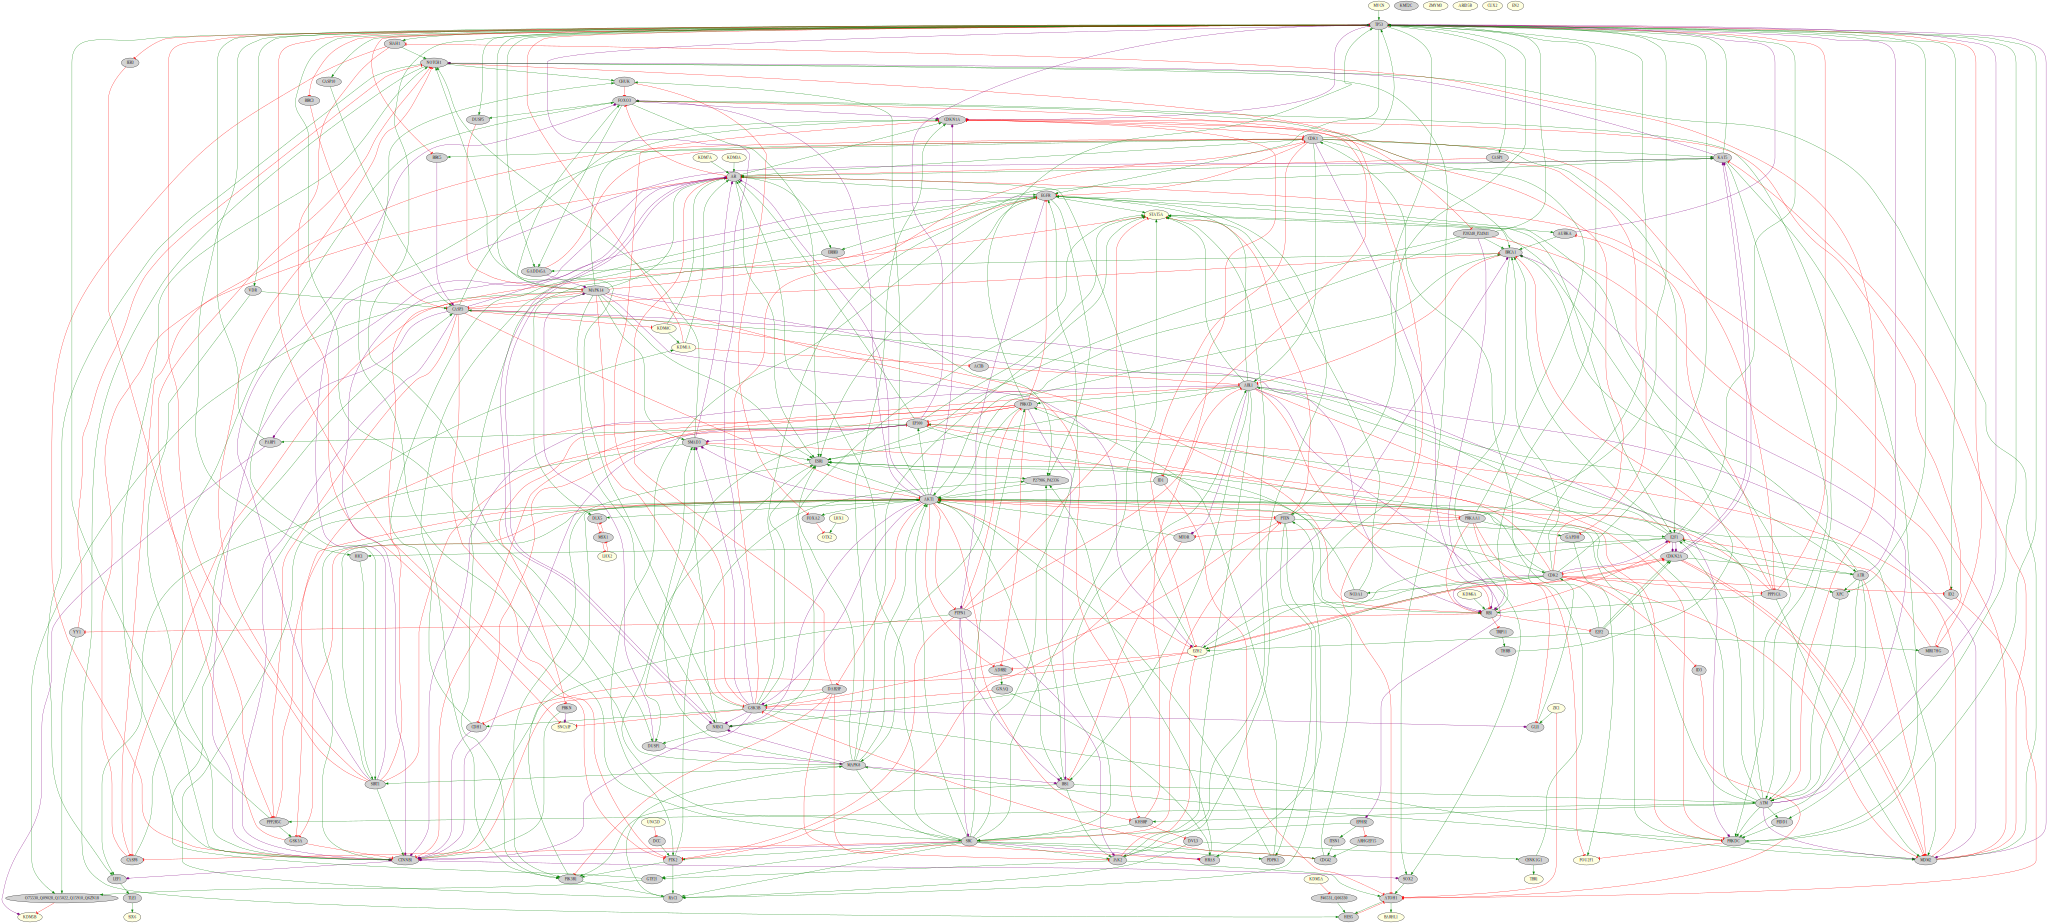

In [43]:
group4_visualizer = NetworkVisualizer(group4_net,color_by='effect', noi=True)
output = figures_folder + "Group4/Group4_all_omnipath"
group4_visualizer.render(output_file=output)

# Exporting Network in sif file

In [26]:
from neko._outputs.exports import Exports

In [27]:
for node in group4_net.nodes["Uniprot"]:
    if group4_net.edges[group4_net.edges["source"].isin([node])].empty and group4_net.edges[group4_net.edges["target"].isin([node])].empty:
        print(group4_net.nodes[group4_net.nodes["Uniprot"] == node])
        group4_net.remove_node(node)

In [28]:
export = Exports(group4_net)

In [29]:
export.export_sif(sif_output + "Group4_all_omnipath.sif")